In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_labels=tf.one_hot(train_labels,depth=10).numpy()
test_labels=tf.one_hot(test_labels,depth=10).numpy()

train_images=train_images/255.0
test_images=test_images/255.0

2023-03-12 18:50:02.872298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=64,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(units=32,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
''' or setup the model at a single time:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer='normal',activation=tf.nn.relu),
    tf.keras.layers.Dense(32,kernel_initializer='normal',activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
'''
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [4]:
train_epochs=5
batch_size=50
model_history=model.fit(train_images,train_labels,validation_split=0.2,epochs=train_epochs,batch_size=batch_size,verbose=2)

Epoch 1/5
960/960 - 2s - loss: 0.4108 - accuracy: 0.8812 - val_loss: 0.2047 - val_accuracy: 0.9415 - 2s/epoch - 2ms/step
Epoch 2/5
960/960 - 1s - loss: 0.1856 - accuracy: 0.9444 - val_loss: 0.1582 - val_accuracy: 0.9526 - 1s/epoch - 1ms/step
Epoch 3/5
960/960 - 1s - loss: 0.1411 - accuracy: 0.9583 - val_loss: 0.1410 - val_accuracy: 0.9572 - 1s/epoch - 1ms/step
Epoch 4/5
960/960 - 1s - loss: 0.1126 - accuracy: 0.9667 - val_loss: 0.1265 - val_accuracy: 0.9618 - 1s/epoch - 1ms/step
Epoch 5/5
960/960 - 1s - loss: 0.0934 - accuracy: 0.9725 - val_loss: 0.1214 - val_accuracy: 0.9640 - 1s/epoch - 1ms/step


In [5]:
model_history.history

{'loss': [0.4108377993106842,
  0.1855834722518921,
  0.1410878449678421,
  0.11256957054138184,
  0.09338577091693878],
 'accuracy': [0.8812291622161865,
  0.9444375038146973,
  0.9582708477973938,
  0.9666875004768372,
  0.9724791646003723],
 'val_loss': [0.20471574366092682,
  0.15817618370056152,
  0.14103913307189941,
  0.12652604281902313,
  0.1214408129453659],
 'val_accuracy': [0.9415000081062317,
  0.9525833129882812,
  0.9571666717529297,
  0.9618333578109741,
  0.9639999866485596]}

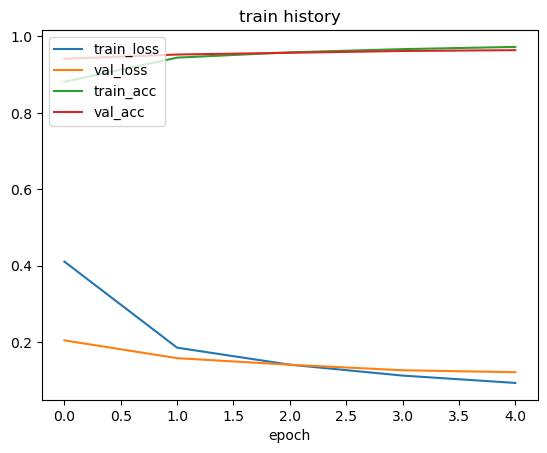

In [6]:
def show_train_history(model_history,train_loss,val_loss,train_acc,val_acc):
    plt.plot(model_history.history[train_loss])
    plt.plot(model_history.history[val_loss])
    plt.plot(model_history.history[train_acc])
    plt.plot(model_history.history[val_acc])
    plt.title('train history')
    plt.xlabel('epoch')
    plt.legend(['train_loss','val_loss','train_acc','val_acc'],loc='upper left')
    plt.show()

show_train_history(model_history,'loss','val_loss','accuracy','val_accuracy')

In [7]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
test_pred=model.predict(test_images)
test_pred.shape

313/313 - 0s - loss: 0.1159 - accuracy: 0.9654 - 323ms/epoch - 1ms/step
313/313 [==============================] - 0s 641us/step


(10000, 10)